## Install neccessary tools, libraries, etc.

In [ ]:
!wget https://arxiv.org/pdf/1706.03762.pdf

--2024-07-19 14:18:26--  https://arxiv.org/pdf/1706.03762.pdf
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/1706.03762 [following]
--2024-07-19 14:18:26--  http://arxiv.org/pdf/1706.03762
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762.pdf’

1706.03762.pdf      100%[===================>]   2.11M  --.-KB/s    in 0.04s   

2024-07-19 14:18:26 (50.4 MB/s) - ‘1706.03762.pdf’ saved [2215244/2215244]



In [ ]:
!pip install -q layoutparser torchvision "layoutparser[ocr]"
!pip install -q "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigtable 2.24.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
  Preparing metadata (setup.py) ... done


In [ ]:
# Neccessary for the pdf2image package
!apt-get install poppler-utils

# Install dependencies for OCR
!apt install libtesseract-dev tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (209 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


## Import important libraries

In [ ]:
from PIL import Image, ImageDraw, ImageFont

import numpy as np
import matplotlib.pyplot as plt

import layoutparser as lp
import layoutparser.ocr as ocr

## Utils

In [ ]:
def pil_to_numpy(image) -> np.array:
    return np.array(image)

## Data

In [ ]:
pdf_layout, pdf_images = lp.load_pdf("/content/1706.03762.pdf", load_images=True)
print(len(pdf_layout))
print(len(pdf_images))

15
15


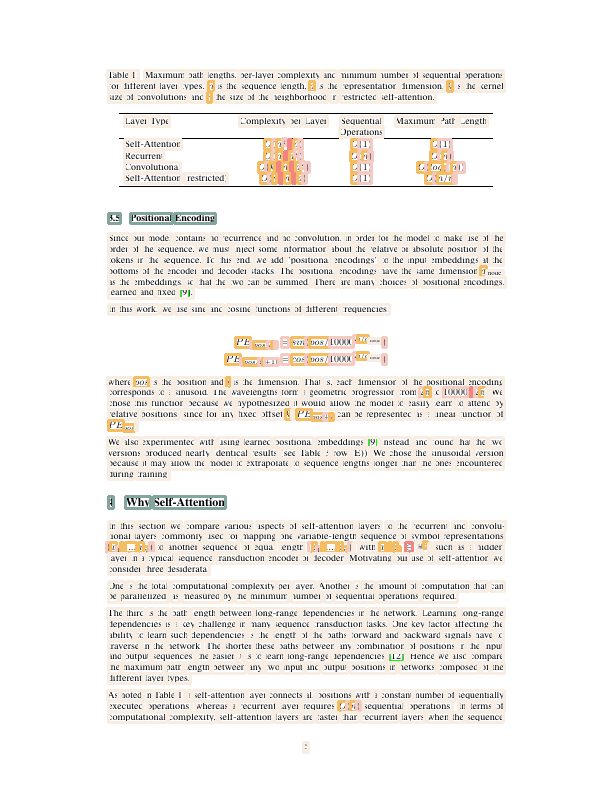

In [ ]:
page = 5
lp.draw_box(pdf_images[page], pdf_layout[page])

## Model

In [ ]:
model = lp.Detectron2LayoutModel(
            config_path ='lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', # In model catalog
            label_map = {0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )
model

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
ocr_agent = ocr.TesseractAgent()
ocr_agent

## Experiment

In [ ]:
page = 3
image = pdf_images[page]

In [ ]:
layout = model.detect(image)
type(layout)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
layout[0]

TextBlock(block=Rectangle(x_1=104.25968170166016, y_1=649.7081909179688, x_2=506.5906982421875, y_2=693.83984375), text=None, id=None, type=Text, parent=None, next=None, score=0.9983341097831726)

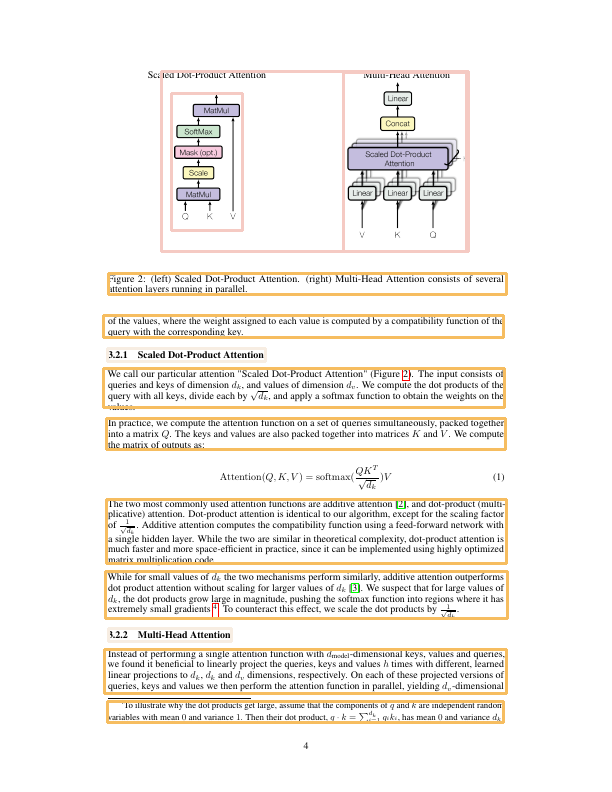

In [ ]:
lp.draw_box(image, layout, box_width=3)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=104.25968170166016, y_1=649.7081909179688, x_2=506.5906982421875, y_2=693.83984375), text=None, id=None, type=Text, parent=None, next=None, score=0.9983341097831726), TextBlock(block=Rectangle(x_1=106.88810729980469, y_1=418.4892578125, x_2=505.16400146484375, y_2=449.4576721191406), text=None, id=None, type=Text, parent=None, next=None, score=0.9948835968971252), TextBlock(block=Rectangle(x_1=107.10713958740234, y_1=701.4988403320312, x_2=503.7550964355469, y_2=722.9376831054688), text=None, id=None, type=Text, parent=None, next=None, score=0.9944252967834473), TextBlock(block=Rectangle(x_1=103.73983764648438, y_1=315.94580078125, x_2=503.9067687988281, y_2=337.9379577636719), text=None, id=None, type=Text, parent=None, next=None, score=0.9903355836868286), TextBlock(block=Rectangle(x_1=106.53562927246094, y_1=499.0950927734375, x_2=506.0450744628906, y_2=563.0943603515625), text=None, id=None, type=Text, parent=None, next=None, score=0.98

In [ ]:
# Remove text block inside a Figure
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = np.array(image).shape[:2]
print(h)
print(w)

792
612


In [ ]:
h, w = np.array(image).shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)
print(left_interval)

Interval(start=0, end=321.3, axis=x, canvas_height=792, canvas_width=612)


In [ ]:
left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks = sorted(left_blocks, key = lambda b:b.coordinates[1])
print(left_blocks)

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks = sorted(right_blocks, key = lambda b:b.coordinates[1])
print(right_blocks)

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
print(text_blocks)

[TextBlock(block=Rectangle(x_1=108.70089721679688, y_1=273.0675964355469, x_2=506.1226501464844, y_2=294.4736633300781), text=None, id=None, type=Text, parent=None, next=None, score=0.9882319569587708), TextBlock(block=Rectangle(x_1=103.73983764648438, y_1=315.94580078125, x_2=503.9067687988281, y_2=337.9379577636719), text=None, id=None, type=Text, parent=None, next=None, score=0.9903355836868286), TextBlock(block=Rectangle(x_1=103.64848327636719, y_1=368.99224853515625, x_2=504.4725646972656, y_2=407.40972900390625), text=None, id=None, type=Text, parent=None, next=None, score=0.955493688583374), TextBlock(block=Rectangle(x_1=106.88810729980469, y_1=418.4892578125, x_2=505.16400146484375, y_2=449.4576721191406), text=None, id=None, type=Text, parent=None, next=None, score=0.9948835968971252), TextBlock(block=Rectangle(x_1=106.53562927246094, y_1=499.0950927734375, x_2=506.0450744628906, y_2=563.0943603515625), text=None, id=None, type=Text, parent=None, next=None, score=0.98856943845

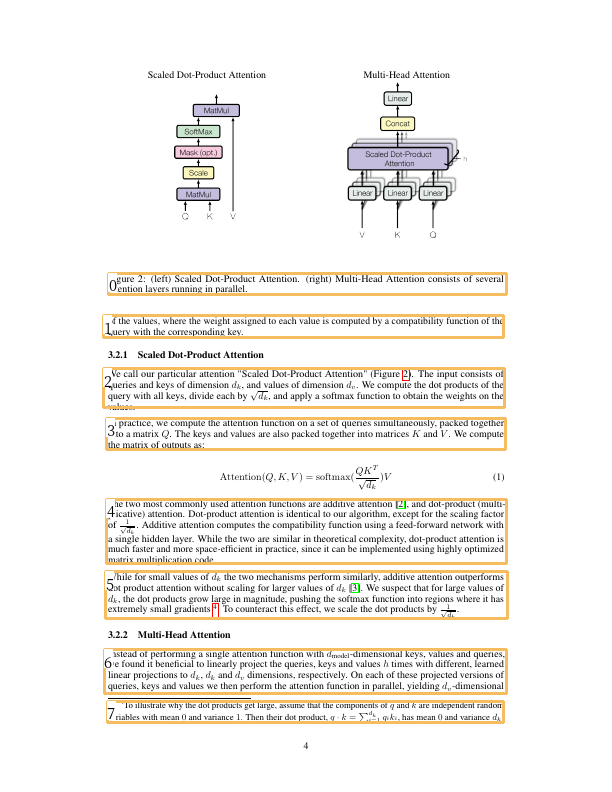

In [ ]:
# Text box

lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [ ]:
for block in text_blocks:
    segment_image = (block.pad(left=5, right=5, top=5, bottom=5)
                            .crop_image(np.array(image)))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
idx = 0
for txt in text_blocks.get_texts():
    print(idx, txt, end='\n---\n')
    idx += 1

0 ‘Figure 2: (left) Scaled Dot-Produet Attention. (right) Multi-Head Attention consists of several
‘elon layers unig in parallel.

---
1 ‘of the values, where the weight assigned to each value is computed by 3 compatibility Function of the
‘query with the corresponding key.

---
2 ‘We call our particular attention "Scaled Dot-Product Attention” (Figure BJ}. The input consists of
«queries and Leys of dnension dj and values of dimension ds. We compule the dt products of the
{query with all ey, avid each by, and apply a softmax funtion to obtain the weighs on the
=

---
3 In practice, we compute the attention function on a set of queries simultaneously. packed together
Jno a matin Q. The hes and Values ate als packed goer into matrices K and V. We compute
‘he matrix of outputs a:

---
4 The two most commonly used attention functions are additive attention (2), and dot-peosuet (mult
‘Micatve)stenton, Bot product tendon ts enc to our algo, excep forthe sealing factor
fof ai Additive att

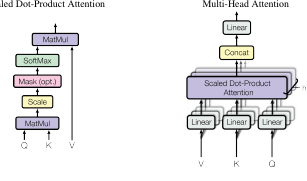

In [ ]:
# Crop imgs from pdf
sample = figure_blocks[0]
# Rectangle(x_1=161.01519775390625, y_1=71.43032836914062, x_2=468.2375183105469, y_2=251.55343627929688)
# (x_1, y_1, x_2, y_2) = (sample.block.x_1, sample.block.y_1, sample.block.x_2, sample.block.y_2)
box = (sample.block.x_1, sample.block.y_1, sample.block.x_2, sample.block.y_2)
img2 = image.crop(box)

img2